In [2]:
import os
import pickle
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
DATA_PATH = '../data/raw'
ALPHABETS_PATH = DATA_PATH + '/alphabets'
LABELS_PATH = DATA_PATH + '/labels.csv'

In [4]:
labels_df = pd.read_csv(LABELS_PATH)
labels_df.shape

(54049, 3)

In [5]:
labels_df.head()

,#,File_Name,Class
0,1,AIN (1).JPG,ain
1,2,AIN (10).JPG,ain
2,3,AIN (100).jpg,ain
3,4,AIN (1000).JPG,ain
4,5,AIN (1001).JPG,ain


In [6]:
labels_df['Class'].unique(), labels_df['Class'].nunique()

(array(['ain', 'al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 'gaaf',
        'ghain', 'ha', 'haa', 'jeem', 'kaaf', 'khaa', 'la', 'laam', 'meem',
        'nun', 'ra', 'saad', 'seen', 'sheen', 'ta', 'taa', 'thaa', 'thal',
        'toot', 'waw', 'ya', 'yaa', 'zay'], dtype=object),
 32)

_We have 32 letters in total_

In [7]:
classes = labels_df['Class'].value_counts()
classes

Class
ain      2114
ghain    1977
fa       1955
saad     1895
taa      1838
laam     1832
nun      1819
ta       1816
toot     1791
bb       1791
kaaf     1774
thaa     1766
meem     1765
la       1746
dha      1723
ya       1722
gaaf     1705
aleff    1672
dhad     1670
ra       1659
seen     1638
dal      1634
khaa     1607
ha       1592
thal     1582
jeem     1552
haa      1526
sheen    1507
zay      1374
waw      1371
al       1343
yaa      1293
Name: count, dtype: int64

Text(0.5, 1.0, 'Alphabets distribution')

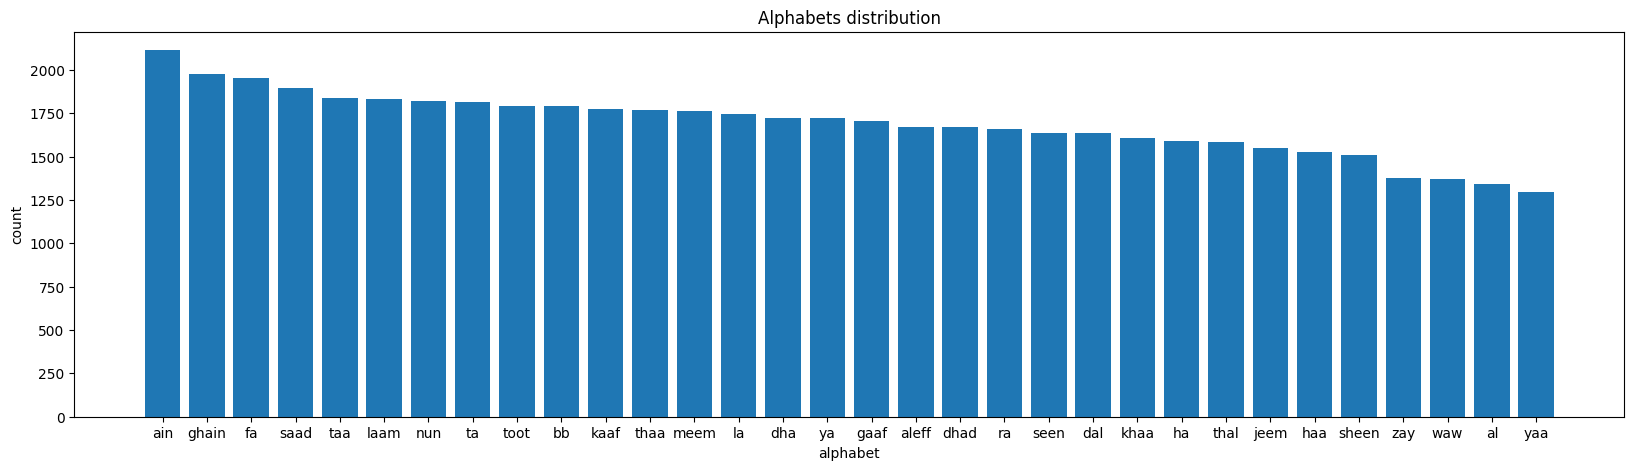

In [8]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(5)
ax.bar(classes.keys().tolist(), classes.tolist())
ax.set_xlabel('alphabet')
ax.set_ylabel('count')
ax.set_title('Alphabets distribution')

In [9]:
min(classes), 0.8*min(classes), 0.2*min(classes)

(1293, 1034.4, 258.6)

_We will use only 1293 images_

In [10]:
# Let's group the DataFrame by the 'Class' column and sample 1293 rows from each group
sampled_labels_df = labels_df.groupby('Class', group_keys=False).apply(lambda x: x.sample(n=1293, replace=False))
sampled_labels_df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_18656\1762290342.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_labels_df = labels_df.groupby('Class', group_keys=False).apply(lambda x: x.sample(n=1293, replace=False))


,#,File_Name,Class
430,431,AIN (1386).jpg,ain
1590,1591,AIN (527).jpg,ain
606,607,AIN (1544).jpg,ain
1297,1298,AIN (263).jpg,ain
1745,1746,AIN (667).jpg,ain


In [11]:
sampled_labels_df['Class'].value_counts()

Class
ain      1293
al       1293
yaa      1293
ya       1293
waw      1293
toot     1293
thal     1293
thaa     1293
taa      1293
ta       1293
sheen    1293
seen     1293
saad     1293
ra       1293
nun      1293
meem     1293
laam     1293
la       1293
khaa     1293
kaaf     1293
jeem     1293
haa      1293
ha       1293
ghain    1293
gaaf     1293
fa       1293
dhad     1293
dha      1293
dal      1293
bb       1293
aleff    1293
zay      1293
Name: count, dtype: int64

## **Processing images using Mediapipe**

In [12]:
import mediapipe as mp
import cv2

In [145]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

data = []
labels = []

folders = os.listdir(ALPHABETS_PATH) # List of all alphabet directories
for i, alphabet_dir in enumerate(folders):
    print(f"Alphabet: {alphabet_dir} ({i+1}/{len(folders)})")

    # Get the list of all files in the current alphabet directory
    files = os.listdir(os.path.join(ALPHABETS_PATH, alphabet_dir))
    
    # Filter files that are in the sampled DataFrame
    filtered_files = [file for file in files if file in sampled_labels_df['File_Name'].tolist()]

    for file_name in filtered_files:
            
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(ALPHABETS_PATH, alphabet_dir, file_name))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            data.append(data_aux)
            labels.append(alphabet_dir)

Alphabet: ain (1/32)	| Total images:  1293
Alphabet: al (2/32)	| Total images:  1293
Alphabet: aleff (3/32)	| Total images:  1293
Alphabet: bb (4/32)	| Total images:  1293
Alphabet: dal (5/32)	| Total images:  1293
Alphabet: dha (6/32)	| Total images:  1293
Alphabet: dhad (7/32)	| Total images:  1293
Alphabet: fa (8/32)	| Total images:  1293
Alphabet: gaaf (9/32)	| Total images:  1293
Alphabet: ghain (10/32)	| Total images:  1293
Alphabet: ha (11/32)	| Total images:  1293
Alphabet: haa (12/32)	| Total images:  1293
Alphabet: jeem (13/32)	| Total images:  1293
Alphabet: kaaf (14/32)	| Total images:  1293
Alphabet: khaa (15/32)	| Total images:  1293
Alphabet: la (16/32)	| Total images:  1293
Alphabet: laam (17/32)	| Total images:  1293
Alphabet: meem (18/32)	| Total images:  1293
Alphabet: nun (19/32)	| Total images:  1293
Alphabet: ra (20/32)	| Total images:  1293
Alphabet: saad (21/32)	| Total images:  1293
Alphabet: seen (22/32)	| Total images:  1293
Alphabet: sheen (23/32)	| Total im

In [146]:
f = open('../data/processed/data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

## **Processing images using tensorflow**

In [22]:
from sklearn.model_selection import train_test_split
import keras

In [19]:
folders = os.listdir(ALPHABETS_PATH) # List of all alphabet directories
images = []
labels = []
for i, alphabet_dir in enumerate(folders):
    print(f"Alphabet: {alphabet_dir} ({i+1}/{len(folders)})")

    # Get the list of all files in the current alphabet directory
    files = os.listdir(os.path.join(ALPHABETS_PATH, alphabet_dir))
    
    # Filter files that are in the sampled DataFrame
    filtered_files = [file for file in files if file in sampled_labels_df['File_Name'].tolist()]

    for file_name in filtered_files:
        file_path = os.path.join(ALPHABETS_PATH, alphabet_dir, file_name)
        image = cv2.resize(cv2.imread(file_path), (64, 64))
        images.append(image)
        labels.append(i)
images = np.array(images)
labels = np.array(labels)
        

Alphabet: ain (1/32)
Alphabet: al (2/32)
Alphabet: aleff (3/32)
Alphabet: bb (4/32)
Alphabet: dal (5/32)
Alphabet: dha (6/32)
Alphabet: dhad (7/32)
Alphabet: fa (8/32)
Alphabet: gaaf (9/32)
Alphabet: ghain (10/32)
Alphabet: ha (11/32)
Alphabet: haa (12/32)
Alphabet: jeem (13/32)
Alphabet: kaaf (14/32)
Alphabet: khaa (15/32)
Alphabet: la (16/32)
Alphabet: laam (17/32)
Alphabet: meem (18/32)
Alphabet: nun (19/32)
Alphabet: ra (20/32)
Alphabet: saad (21/32)
Alphabet: seen (22/32)
Alphabet: sheen (23/32)
Alphabet: ta (24/32)
Alphabet: taa (25/32)
Alphabet: thaa (26/32)
Alphabet: thal (27/32)
Alphabet: toot (28/32)
Alphabet: waw (29/32)
Alphabet: ya (30/32)
Alphabet: yaa (31/32)
Alphabet: zay (32/32)


In [20]:
images.shape

(41376, 64, 64, 3)

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(images, labels, test_size = 0.1, stratify = labels)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train)

print("Training images: " , len(X_train))
print("Testing images: ", len(X_test))
print("Evaluation images: ", len(X_eval))

Training images:  29790
Testing images:  7448
Evaluation images:  4138


In [23]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

In [26]:
print(y_train[0])
print(len(y_train[0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0.]
32


In [27]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

In [31]:
np.save('../data/processed/X_train.npy', X_train)
np.save('../data/processed/X_test.npy', X_test)
np.save('../data/processed/X_eval.npy', X_eval)

In [32]:
np.save('../data/processed/y_train.npy', y_train)
np.save('../data/processed/y_test.npy', y_test)
np.save('../data/processed/y_eval.npy', y_eval)